# Project: Investigate F1 Ergast Dataset


## Introduction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import typing
import os
import zipfile

**REPLACE AS PER YOUR NEED**

In [3]:
root_directory = "your root directory here"
data_directory = "your data directory here"


In [4]:
def ROOT_DIRECTORY():

    global root_directory
    if root_directory == "your root directory here":
        
        root_directory = "/Users/mililic/Documents/UMA_big_data/TFM/my_TFM/notebooks"
    return root_directory

def DATA_DIRECTORY():
    
    global data_directory
    if data_directory == "your data directory here":
        
        data_directory = "data/csv_ergast_data"
    
    return data_directory

<a id='wrangling'></a>
## Data Wrangling

### Loading data

In [6]:
# LOADING ERGAST DATA
def unzip_data(file_name='f1db_csv.zip', root_directory=ROOT_DIRECTORY(), data_directory=DATA_DIRECTORY()):
    
    path = os.path.join(ROOT_DIRECTORY(), DATA_DIRECTORY(),'f1db_csv.zip')
    with zipfile.ZipFile(path, 'r') as myzip:
        myzip.extractall(os.path.join(ROOT_DIRECTORY(), DATA_DIRECTORY()))

def get_data_from_csv(file_name, root_directory=ROOT_DIRECTORY(), data_directory=DATA_DIRECTORY()):            
    
    csv_data_directory = os.path.join(root_directory, data_directory, file_name)
    return pd.read_csv(csv_data_directory)

All csv were modified replacing "\N" for "" in text editor to the Null value to be recognized by python.

In [7]:
unzip_data()

In [8]:
# ergast data dataframes
file_names = {"drivers": "drivers.csv", "driver_standings":"driver_standings.csv",
                "circuits": "circuits.csv", 'races': 'races.csv',
                'constructor_results': 'constructor_results.csv', 
                'constructor_standings': 'constructor_standings.csv',
                'constructors': 'constructors.csv', "lap_times": "lap_times.csv", 'pit_stops': 'pit_stops.csv',
                "qualifying": "qualifying.csv", 'results': 'results.csv',
                'seasons': 'seasons.csv', 'status':'status.csv'}

drivers= get_data_from_csv(file_names["drivers"]) 
driver_standings = get_data_from_csv(file_names["driver_standings"])
circuits = get_data_from_csv(file_names["circuits"])
races = get_data_from_csv(file_names['races'])
constructor_results = get_data_from_csv(file_names['constructor_results'])
constructor_standings = get_data_from_csv(file_names['constructor_standings'])
constructors = get_data_from_csv(file_names["constructors"])
lap_times = get_data_from_csv(file_names["lap_times"])
pit_stops = get_data_from_csv(file_names['pit_stops'])
qualifying = get_data_from_csv(file_names['qualifying'])
results = get_data_from_csv(file_names['results'])
seasons = get_data_from_csv(file_names['seasons'])
status = get_data_from_csv(file_names['status'])


### General Properties

In [9]:
def general_properties(data_list):

    for data in data_list:
       
        print("="*100)
        print("="*100,end="\n")
        display(data.info())

In [10]:
def first_values(data_list):

    for data in data_list:
       
        print("="*100)
        print("="*100,end="\n")
        display(data.head(5))


In [11]:
def descriptive_stats(data_list):

     for data in data_list:
       
          print("="*100)
          print("="*100,end="\n")
          display(data.describe())
        

In [12]:
# gruping data 
escuderías = [constructors,constructor_results,constructor_standings]
carreras = [races,lap_times,pit_stops,circuits,qualifying]
results_list = [results,seasons,status] 
pilotos = [drivers,driver_standings]


#### Constructor group data 

In [13]:
first_values(escuderías)

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [14]:
general_properties(escuderías)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12170 entries, 0 to 12169
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  12170 non-null  int64  
 1   raceId                12170 non-null  int64  
 2   constructorId         12170 non-null  int64  
 3   points                12170 non-null  float64
 4   status                12170 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 475.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12941 entries, 0 to 12940
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12941 non-null  int64  
 1   raceId                  12941 non-null  int64  
 2   constructorId           12941 non-null  int64  
 3   points                  12941 non-null  float64
 4   position                12941 non-null  int64  
 5   positionText            12941 non-null  object 
 6   wins                    12941 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 707.8+ KB


None

In [15]:
descriptive_stats(escuderías)

,constructorId
count,211.000000
mean,107.037915
std,61.653629
min,1.000000
25%,54.500000
50%,107.000000
75%,159.500000
max,214.000000


,constructorResultsId,raceId,constructorId,points
count,12170.000000,12170.000000,12170.000000,12170.000000
mean,8106.815037,505.922350,44.160394,3.788661
std,5523.404639,298.367868,57.248981,7.427196
min,1.000000,1.000000,1.000000,0.000000
25%,3043.250000,278.000000,6.000000,0.000000
50%,6085.500000,474.000000,22.000000,0.000000
75%,13593.750000,713.000000,52.000000,4.000000
max,16669.000000,1096.000000,214.000000,66.000000


,constructorStandingsId,raceId,constructorId,points,position,wins
count,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000
mean,16573.817402,515.004946,48.070474,33.776486,7.286068,0.678927
std,8741.992501,292.559215,59.400459,76.875428,4.386319,1.818736
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,8771.000000,294.000000,6.000000,0.000000,4.000000,0.000000
50%,20124.000000,494.000000,25.000000,6.000000,7.000000,0.000000
75%,24592.000000,714.000000,57.000000,31.000000,10.000000,0.000000
max,28412.000000,1098.000000,214.000000,765.000000,22.000000,19.000000


#### Drivers group data 

In [16]:
general_properties(pilotos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33902 entries, 0 to 33901
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33902 non-null  int64  
 1   raceId             33902 non-null  int64  
 2   driverId           33902 non-null  int64  
 3   points             33902 non-null  float64
 4   position           33902 non-null  int64  
 5   positionText       33902 non-null  object 
 6   wins               33902 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


None

In [17]:
descriptive_stats(pilotos)

,driverId
count,857.000000
mean,429.057176
std,247.632402
min,1.000000
25%,215.000000
50%,429.000000
75%,643.000000
max,858.000000


,driverStandingsId,raceId,driverId,points,position,wins
count,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000
mean,42342.373901,569.165506,304.342782,13.329134,19.958085,0.268893
std,21668.533758,281.792241,264.834962,35.392937,16.425503,0.992981
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,19594.250000,345.000000,85.000000,0.000000,8.000000,0.000000
50%,49563.500000,593.000000,219.000000,1.000000,16.000000,0.000000
75%,58779.750000,795.000000,501.000000,10.000000,26.000000,0.000000
max,71845.000000,1098.000000,858.000000,454.000000,108.000000,15.000000


### races group data

In [18]:
general_properties(carreras)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1102 non-null   int64 
 1   year         1102 non-null   int64 
 2   round        1102 non-null   int64 
 3   circuitId    1102 non-null   int64 
 4   name         1102 non-null   object
 5   date         1102 non-null   object
 6   time         1102 non-null   object
 7   url          1102 non-null   object
 8   fp1_date     1102 non-null   object
 9   fp1_time     1102 non-null   object
 10  fp2_date     1102 non-null   object
 11  fp2_time     1102 non-null   object
 12  fp3_date     1102 non-null   object
 13  fp3_time     1102 non-null   object
 14  quali_date   1102 non-null   object
 15  quali_time   1102 non-null   object
 16  sprint_date  1102 non-null   object
 17  sprint_time  1102 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538121 entries, 0 to 538120
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        538121 non-null  int64 
 1   driverId      538121 non-null  int64 
 2   lap           538121 non-null  int64 
 3   position      538121 non-null  int64 
 4   time          538121 non-null  object
 5   milliseconds  538121 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 24.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9634 entries, 0 to 9633
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        9634 non-null   int64 
 1   driverId      9634 non-null   int64 
 2   stop          9634 non-null   int64 
 3   lap           9634 non-null   int64 
 4   time          9634 non-null   object
 5   duration      9634 non-null   object
 6   milliseconds  9634 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 527.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9575 entries, 0 to 9574
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9575 non-null   int64 
 1   raceId         9575 non-null   int64 
 2   driverId       9575 non-null   int64 
 3   constructorId  9575 non-null   int64 
 4   number         9575 non-null   int64 
 5   position       9575 non-null   int64 
 6   q1             9567 non-null   object
 7   q2             9424 non-null   object
 8   q3             9276 non-null   object
dtypes: int64(6), object(3)
memory usage: 673.4+ KB


None

In [19]:
descriptive_stats(carreras)

,raceId,year,round,circuitId
count,1102.000000,1102.000000,1102.000000,1102.000000
mean,553.853902,1992.049002,8.507260,23.697822
std,321.706151,20.308639,5.097545,19.337398
min,1.000000,1950.000000,1.000000,1.000000
25%,276.250000,1976.000000,4.000000,9.000000
50%,551.500000,1994.000000,8.000000,18.000000
75%,826.750000,2010.000000,12.000000,34.000000
max,1120.000000,2023.000000,23.000000,80.000000


,raceId,driverId,lap,position,milliseconds
count,538121.000000,538121.000000,538121.000000,538121.000000,5.381210e+05
mean,551.226841,285.445078,29.965461,9.651287,9.572079e+04
std,422.395496,373.403612,18.412489,5.539014,7.477436e+04
min,1.000000,1.000000,1.000000,1.000000,5.540400e+04
25%,129.000000,15.000000,14.000000,5.000000,8.207100e+04
50%,841.000000,37.000000,29.000000,9.000000,9.067300e+04
75%,966.000000,817.000000,44.000000,14.000000,1.023190e+05
max,1096.000000,856.000000,87.000000,24.000000,7.507547e+06


,raceId,driverId,stop,lap,milliseconds
count,9634.000000,9634.000000,9634.000000,9634.000000,9.634000e+03
mean,956.103384,513.030828,1.760536,25.255553,7.240173e+04
std,76.862933,391.682304,0.914522,14.579838,2.738340e+05
min,841.000000,1.000000,1.000000,1.000000,1.289700e+04
25%,885.000000,18.000000,1.000000,13.000000,2.190825e+04
50%,953.000000,815.000000,2.000000,25.000000,2.355700e+04
75%,1024.000000,830.000000,2.000000,36.000000,2.618675e+04
max,1096.000000,856.000000,6.000000,78.000000,3.069017e+06


,circuitId,lat,lng
count,77.000000,77.000000,77.000000
mean,39.883117,33.442925,1.076683
std,23.001701,22.808866,65.516951
min,1.000000,-37.849700,-118.189000
25%,20.000000,32.777400,-9.394170
50%,40.000000,40.951700,3.930830
75%,59.000000,46.958900,19.248600
max,80.000000,57.265300,144.968000


,qualifyId,raceId,driverId,constructorId,number,position
count,9575.000000,9575.000000,9575.000000,9575.000000,9575.000000,9575.000000
mean,4798.950078,576.919582,303.456710,43.512376,17.865483,11.263603
std,2777.072171,418.409302,377.386772,69.884962,17.633755,6.302077
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2395.500000,116.500000,15.000000,4.000000,7.000000,6.000000
50%,4790.000000,851.000000,49.000000,9.000000,14.000000,11.000000
75%,7203.500000,972.000000,817.000000,25.000000,22.000000,17.000000
max,9632.000000,1096.000000,856.000000,214.000000,99.000000,28.000000


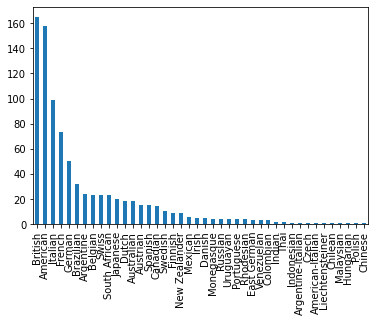

In [20]:
drivers.nationality.value_counts().plot(kind="bar");

In [21]:
descriptive_stats(results_list)

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,12921.334327,531.425813,261.732082,48.628328,11.179063,12.876006,1.877053,45.977515,17.568692
std,7460.682031,299.440908,268.623016,59.732131,7.243725,7.712391,4.169849,29.808951,26.155476
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6460.750000,293.000000,56.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000
50%,12920.500000,514.000000,163.000000,25.000000,11.000000,12.000000,0.000000,52.000000,11.000000
75%,19380.250000,784.000000,360.000000,58.000000,17.000000,18.000000,2.000000,66.000000,14.000000
max,25845.000000,1096.000000,856.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000


,year
count,74.000000
mean,1986.500000
std,21.505813
min,1950.000000
25%,1968.250000
50%,1986.500000
75%,2004.750000
max,2023.000000


,statusId
count,139.000000
mean,71.237410
std,41.092434
min,1.000000
25%,35.500000
50%,72.000000
75%,106.500000
max,141.000000


In [22]:
first_values(results_list)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [23]:
general_properties(results_list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number           25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time             25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    74 non-null     int64 
 1   url     74 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  139 non-null    int64 
 1   status    139 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


None

In [24]:
mask= drivers.nationality == "Argentine-Italian"
drivers[mask]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
573,573,tomaso,\N,\N,Alessandro,de Tomaso,1928-07-10,Argentine-Italian,http://en.wikipedia.org/wiki/Alessandro_de_Tomaso


### Data Cleaning 

> driver_standings --> per season (this means, per year)
   > * points -->  Driver points per season
   > * wins --> season win count

#### drivers

number and code  in drivers is Null for various drivers and does not add value to the study

In [28]:
drivers.drop(columns=["number","code"], inplace=True)

change date colum to datetime format

In [31]:
drivers.dob = pd.to_datetime(drivers.dob)

#### drivers standings

In [26]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


#### races

There is variety of date and time columns with Null data. I will keep just the colums that keeps date and time for the F1 race, but delete those with qualification and sprints, ans fp1, fp2 and fp3 that are "extra" races handled during the same weekend, but that are out of the scope and i will not study this aspect of the F1 races.

In [32]:
races.drop(columns=["quali_date","quali_time","sprint_date","sprint_time", "fp1_date","fp1_time","fp2_date","fp2_time","fp3_date","fp3_time"], inplace=True)

In [ ]:
races.groupby("year").count().tail(10)

,raceId,round,circuitId,name,date,time,url
year,,,,,,,
2014,19,19,19,19,19,19,19
2015,19,19,19,19,19,19,19
2016,21,21,21,21,21,21,21
2017,20,20,20,20,20,20,20
2018,21,21,21,21,21,21,21
2019,21,21,21,21,21,21,21
2020,17,17,17,17,17,17,17
2021,22,22,22,22,22,22,22
2022,22,22,22,22,22,22,22


changing the date column from string to datetime:

In [ ]:
races.date = pd.to_datetime(races.date)

race time is the Race start time e.g."13:00:00" and there is a lot of Null values. checking at the rows that are non Nulls, seems like the field is present for most recent races, starting aprox into to 2005. I will not delete this column yet, because can be valuale for weather study. 

In [ ]:
print(sorted(list(races[~races.time.isnull()].date.dt.year.unique())))

[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [ ]:
display(f"There are {races.raceId.nunique()} races registered in the historical table races")

'There are 1102 races registered in the historical table races'

Pit-stops

In [ ]:
pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [ ]:
pit_stops.shape

(9634, 7)

In [ ]:
pit_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9634 entries, 0 to 9633
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        9634 non-null   int64 
 1   driverId      9634 non-null   int64 
 2   stop          9634 non-null   int64 
 3   lap           9634 non-null   int64 
 4   time          9634 non-null   object
 5   duration      9634 non-null   object
 6   milliseconds  9634 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 527.0+ KB


In [ ]:
#total races with pit-stops data
pit_stops.raceId.nunique()

239

In [ ]:
pit_stops.set_index("raceId", inplace=True)
races.set_index("raceId", inplace=True)

In [ ]:
races_and_stops=pit_stops.join(races,lsuffix="_pit_stops")

In [ ]:
races_and_stops.reset_index(inplace=True)

number of races per year with pit-stops information in the data set:

In [ ]:
races_and_stops.groupby("year").raceId.nunique()

year
2011    19
2012    20
2013    19
2014    19
2015    19
2016    21
2017    20
2018    21
2019    21
2020    17
2021    21
2022    22
Name: raceId, dtype: int64

#### lap_times

In [ ]:
lap_times.df.raceId.nunique()

498

races percent with lap times data in table lap_times

In [ ]:
percent_of_races = round(lap_times.df.raceId.nunique()*100/races.df.raceId.nunique(),2)
display(f"{percent_of_races} %")

'46.15 %'

In [ ]:
lap_times.df.shape

(538121, 6)

In [ ]:
lap_counts = lap_times.df.groupby("raceId").lap.nunique()

I want to keep the numer of laps per race, though I will calculate it and keep it in a new column in the table races

In [ ]:
races.df.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [ ]:
races.df=races.df.join(lap_counts, on="raceId", how="left")

In [ ]:
races.df.rename(columns={"lap":"laps"}, inplace=True)

min number of laps in a race:

In [ ]:
lap_times.df.groupby("raceId").lap.nunique().min()

1

race with max laps ever:

In [ ]:
races.df[races.df["laps"] == races.df.laps.max()]

,raceId,year,round,circuitId,name,date,time,url,laps
1033,1046,2020,16,3,Sakhir Grand Prix,2020-12-06,17:10:00,http://en.wikipedia.org/wiki/2020_Sakhir_Grand...,87.0


average laps per race:

In [ ]:
round(lap_times.df.groupby("raceId").lap.nunique().mean(),0)

61.0

laps per race median 

In [ ]:
lap_times.df.groupby("raceId").lap.nunique().median()

60.0

for lap times I will add a new column with the time per slap in seconds

In [ ]:
lap_times.df["seconds"] = lap_times.df["milliseconds"]/1000

In [ ]:
lap_times.df

,raceId,driverId,lap,position,time,milliseconds,seconds
0,841,20,1,1,1:38.109,98109,98.109
1,841,20,2,1,1:33.006,93006,93.006
2,841,20,3,1,1:32.713,92713,92.713
3,841,20,4,1,1:32.803,92803,92.803
4,841,20,5,1,1:32.342,92342,92.342
...,...,...,...,...,...,...,...
538116,1096,822,53,16,1:32.998,92998,92.998
538117,1096,822,54,16,1:32.995,92995,92.995
538118,1096,822,55,16,1:31.236,91236,91.236
538119,1096,822,56,15,1:30.566,90566,90.566


In [ ]:
lap_times.df.describe()

,raceId,driverId,lap,position,milliseconds,seconds
count,538121.000000,538121.000000,538121.000000,538121.000000,5.381210e+05,538121.000000
mean,551.226841,285.445078,29.965461,9.651287,9.572079e+04,95.720793
std,422.395496,373.403612,18.412489,5.539014,7.477436e+04,74.774357
min,1.000000,1.000000,1.000000,1.000000,5.540400e+04,55.404000
25%,129.000000,15.000000,14.000000,5.000000,8.207100e+04,82.071000
50%,841.000000,37.000000,29.000000,9.000000,9.067300e+04,90.673000
75%,966.000000,817.000000,44.000000,14.000000,1.023190e+05,102.319000
max,1096.000000,856.000000,87.000000,24.000000,7.507547e+06,7507.547000


In [ ]:
display(f"fastest lap registered in this dataset takes {lap_times.df.seconds.min()} seconds")

'fastest lap registered in this dataset takes 55.404 seconds'

In [ ]:
lap_times.df[lap_times.df["seconds"]==lap_times.df.seconds.min()]

,raceId,driverId,lap,position,time,milliseconds,seconds
488409,1046,847,80,14,0:55.404,55404,55.404


In [ ]:
fastest_pilot = drivers.df[drivers.df["driverId"]==847].set_index("driverId")
fastest_pilot

,driverRef,forename,surname,dob,nationality,url
driverId,,,,,,
847,russell,George,Russell,1998-02-15,British,http://en.wikipedia.org/wiki/George_Russell_%2...


In [ ]:
name =fastest_pilot.loc[847]["forename"]
surname = fastest_pilot.loc[847]["surname"]
race_with_fastest_lap = races.df[races.df["raceId"]==1046].set_index("raceId")
race = race_with_fastest_lap.loc[1046]["name"]
year = race_with_fastest_lap.loc[1046]["year"]

In [ ]:
race_with_fastest_lap

,year,round,circuitId,name,date,time,url,laps
raceId,,,,,,,,
1046,2020,16,3,Sakhir Grand Prix,2020-12-06,17:10:00,http://en.wikipedia.org/wiki/2020_Sakhir_Grand...,87.0


In [ ]:
display(f"Based on this dataset, the pilot who made the fastest lap ever was {name} {surname} at the {race} in {year}")

'Based on this dataset, the pilot who made the fastest lap ever was George Russell at the Sakhir Grand Prix in 2020'

**surprisingly, the race with higher laps ever, was at the same time the race with the fastest lap ever**

In [ ]:
url = race_with_fastest_lap.loc[1046]["url"]
url

'http://en.wikipedia.org/wiki/2020_Sakhir_Grand_Prix'

In [ ]:
f"lowest lap registered in this dataset takes {lap_times.df.seconds.max()} seconds"

'lowest lap registered in this dataset takes 7507.547 seconds'

In [ ]:
f"average time lap registered in this dataset is {round(lap_times.df.seconds.mean(),2)} seconds"

'average time lap registered in this dataset is 95.72 seconds'

In [ ]:
races.df

,raceId,year,round,circuitId,name,date,time,url,laps
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,58.0
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,31.0
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,56.0
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,57.0
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,66.0
...,...,...,...,...,...,...,...,...,...
1074,1092,2022,18,22,Japanese Grand Prix,2022-10-09,05:00:00,http://en.wikipedia.org/wiki/2022_Japanese_Gra...,28.0
1075,1093,2022,19,69,United States Grand Prix,2022-10-23,19:00:00,http://en.wikipedia.org/wiki/2022_United_State...,56.0
1076,1094,2022,20,32,Mexico City Grand Prix,2022-10-30,20:00:00,http://en.wikipedia.org/wiki/2022_Mexican_Gran...,71.0
1077,1095,2022,21,18,Brazilian Grand Prix,2022-11-13,18:00:00,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...,71.0


In [ ]:
lap_times.df

,raceId,driverId,lap,position,time,milliseconds,seconds
0,841,20,1,1,1:38.109,98109,98.109
1,841,20,2,1,1:33.006,93006,93.006
2,841,20,3,1,1:32.713,92713,92.713
3,841,20,4,1,1:32.803,92803,92.803
4,841,20,5,1,1:32.342,92342,92.342
...,...,...,...,...,...,...,...
538116,1096,822,53,16,1:32.998,92998,92.998
538117,1096,822,54,16,1:32.995,92995,92.995
538118,1096,822,55,16,1:31.236,91236,91.236
538119,1096,822,56,15,1:30.566,90566,90.566


Total circuits

In [ ]:
display(f"total circuits along F1 history: {races.df.circuitId.nunique()}")

'total circuits along F1 history: 76'

In [ ]:
lap_times.df.set_index("raceId", inplace=True)
races.df.set_index("raceId", inplace=True)

In [ ]:
df=races.df.join(lap_times.df, how="inner", lsuffix="_race")

In [ ]:
df

,year,round,circuitId,name,date,time_race,url,laps,driverId,lap,position,time,milliseconds,seconds
raceId,,,,,,,,,,,,,,
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,58.0,1,1,13,1:49.088,109088,109.088
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,58.0,1,2,12,1:33.740,93740,93.740
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,58.0,1,3,11,1:31.600,91600,91.600
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,58.0,1,4,10,1:31.067,91067,91.067
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,58.0,1,5,10,1:32.129,92129,92.129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,58.0,822,53,16,1:32.998,92998,92.998
1096,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,58.0,822,54,16,1:32.995,92995,92.995
1096,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,58.0,822,55,16,1:31.236,91236,91.236


circuit most used in F1

In [ ]:
races_per_circuit=races.df.reset_index().groupby("circuitId").raceId.count().sort_values()
races_per_circuit.tail()

circuitId
7     41
13    55
9     57
6     68
14    72
Name: raceId, dtype: int64

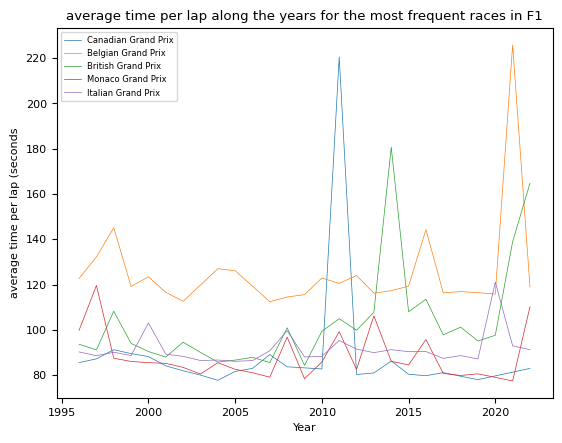

In [ ]:
legend=list()
for i, circuit in races_per_circuit.tail().items():
    df1=df[df["circuitId"]==i].groupby(["year"]).seconds.mean()
    plt.plot(df1)
    plt.xlabel("Year")
    plt.ylabel("average time per lap (seconds")
    plt.title("average time per lap along the years for the most frequent races in F1")
    legend.append(df[df["circuitId"]==i].name.iloc[-1])

plt.legend(legend,prop={"size":6})
plt.rcParams.update({'font.size': 8})   
plt.rcParams["lines.linewidth"]=0.5
plt.show()

In [ ]:
fastest_laps_per_race= lap_times.df.groupby("raceId").seconds.min()
fastest_laps_per_race

raceId
1        87.706
2        96.641
3       112.592
4        94.556
5        82.762
         ...   
1092    104.411
1093     98.788
1094     80.153
1095     73.785
1096     88.391
Name: seconds, Length: 498, dtype: float64

In [ ]:
number_of_races_per_circuit = races.df.reset_index().groupby("circuitId").raceId.count().sort_values()
number_of_races_per_circuit[number_of_races_per_circuit==number_of_races_per_circuit.max()]


circuitId
14    72
Name: raceId, dtype: int64

In [ ]:
number_of_races_per_circuit

circuitId
79     1
60     1
57     1
54     1
42     1
      ..
7     41
13    55
9     57
6     68
14    72
Name: raceId, Length: 76, dtype: int64

In [ ]:
name = set(races.df[races.df["circuitId"]==14].name) 

In [ ]:
display(f"Circuit with highest number of races in F1 is {name}")

"Circuit with highest number of races in F1 is {'Italian Grand Prix'}"

In [ ]:
lap_times_and_count = races.df.join(fastest_laps_per_race, how="inner").drop(columns=["date","time","url"]).sort_values(by="year")
lap_times_and_count[lap_times_and_count["circuitId"]==14]

,year,round,circuitId,name,laps,seconds
raceId,,,,,,
237,1996,14,14,Italian Grand Prix,53.0,86.110
219,1997,13,14,Italian Grand Prix,53.0,84.808
204,1998,14,14,Italian Grand Prix,53.0,85.139
187,1999,13,14,Italian Grand Prix,53.0,85.579
171,2000,14,14,Italian Grand Prix,53.0,85.595
155,2001,15,14,Italian Grand Prix,53.0,85.073
138,2002,15,14,Italian Grand Prix,53.0,83.657
121,2003,14,14,Italian Grand Prix,53.0,81.832
104,2004,15,14,Italian Grand Prix,53.0,81.046


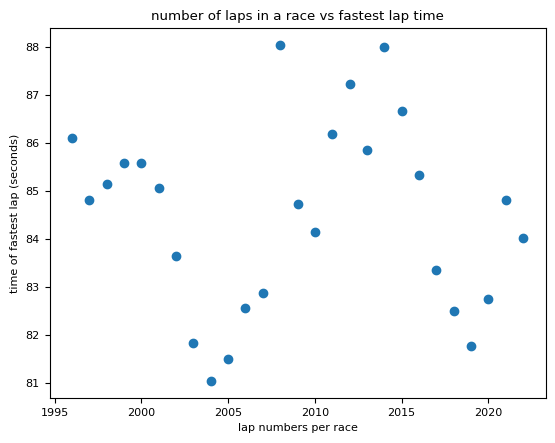

In [ ]:
y=lap_times_and_count[lap_times_and_count["circuitId"]==14].seconds
x=lap_times_and_count[lap_times_and_count["circuitId"]==14].year
plt.scatter(x, y)
plt.xlabel("lap numbers per race")
plt.ylabel("time of fastest lap (seconds)")
plt.title("number of laps in a race vs fastest lap time")
plt.show()

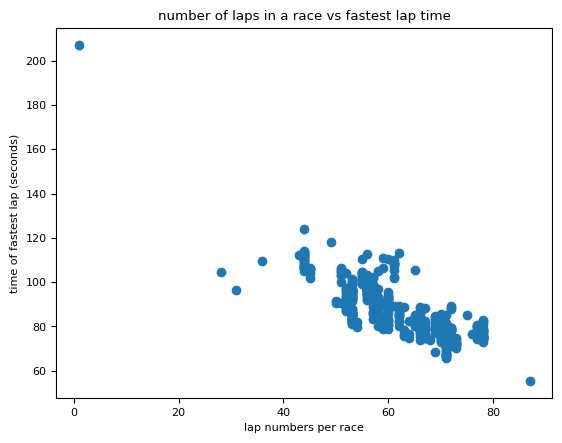

In [ ]:
plt.scatter(lap_times_and_count.laps, lap_times_and_count.seconds)
plt.xlabel("lap numbers per race")
plt.ylabel("time of fastest lap (seconds)")
plt.title("number of laps in a race vs fastest lap time")
plt.show()